 # London Housing Case Study - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [4]:
print(properties.info())
print(properties.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            316 non-null    datetime64[ns]
 1   City of London        317 non-null    object        
 2   Barking & Dagenham    317 non-null    object        
 3   Barnet                317 non-null    object        
 4   Bexley                317 non-null    object        
 5   Brent                 317 non-null    object        
 6   Bromley               317 non-null    object        
 7   Camden                317 non-null    object        
 8   Croydon               317 non-null    object        
 9   Ealing                317 non-null    object        
 10  Enfield               317 non-null    object        
 11  Greenwich             317 non-null    object        
 12  Hackney               317 non-null    object        
 13  Hammersmith & Fulham

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [5]:
properties_transposed = properties.T
properties_transposed = properties_transposed.reset_index()
properties_transposed.columns = properties_transposed.iloc[0]
#swapping positions of line 2 and 3 here will result in an extra index 'Unnamed: 0' that is very difficult to remove.
properties_transposed = properties_transposed.drop(0)
properties_transposed.head()


,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,786626.6665,827658.5167,798499.1646,836807.0518,769391.7847,801999.0466,770030.8669,741900.0531,742627.5735,793431.7231
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,304555.5886,304923.5027,301702.4656,304852.1338,305012.3291,309560.1023,311332.8343,313825.9102,315750.633,312287.8094
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,523279.8903,529660.1524,533619.23,530353.5205,528816.4928,532528.0926,544412.9646,542544.8703,538884.201,544682.0964
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,344091.2308,346679.9244,345061.4945,345404.9836,346252.9145,352260.8385,357006.2787,360401.9947,364888.3401,358959.2269
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,482303.0931,497729.0327,519561.8277,522239.3216,513100.814,495066.6459,510761.24,513926.8708,509360.1162,479009.9817


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [6]:
properties_transposed.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT:'ID'},inplace = True)
properties_transposed.head()



,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,786626.6665,827658.5167,798499.1646,836807.0518,769391.7847,801999.0466,770030.8669,741900.0531,742627.5735,793431.7231
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,304555.5886,304923.5027,301702.4656,304852.1338,305012.3291,309560.1023,311332.8343,313825.9102,315750.633,312287.8094
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,523279.8903,529660.1524,533619.23,530353.5205,528816.4928,532528.0926,544412.9646,542544.8703,538884.201,544682.0964
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,344091.2308,346679.9244,345061.4945,345404.9836,346252.9145,352260.8385,357006.2787,360401.9947,364888.3401,358959.2269
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,482303.0931,497729.0327,519561.8277,522239.3216,513100.814,495066.6459,510761.24,513926.8708,509360.1162,479009.9817


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [7]:
properties_m = pd.melt(properties_transposed, id_vars = ['London_Borough', 'ID'])
properties_m.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [8]:
properties_m = properties_m.rename(columns= {0:'Month', 'value':'Average_price'})

properties_m.head()


,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [9]:
properties_m['Average_price'] = pd.to_numeric(properties_m['Average_price'])

properties_m.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [10]:
unique_boroughs = properties_m['London_Borough'].unique()
unique_boroughs

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [11]:
properties_m = properties_m.dropna()

properties_m.isna().any()

London_Borough    False
ID                False
Month             False
Average_price     False
dtype: bool

In [12]:
properties_m.isna().sum() 

London_Borough    0
ID                0
Month             0
Average_price     0
dtype: int64

In [13]:
boroughs = properties_m['London_Borough'].unique()
boroughs

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [14]:
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [15]:
properties_m = properties_m[~properties_m['London_Borough'].isin(nonBoroughs)]

boroughs = properties_m['London_Borough'].unique()
boroughs

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

<AxesSubplot:xlabel='Month'>

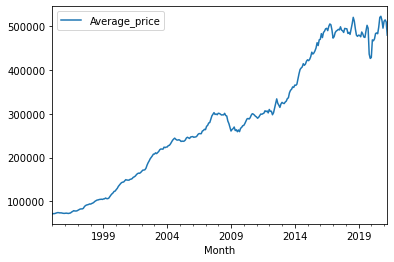

In [18]:
#ploting Month vs. Average Price for the borough Brent
brent = properties_m['London_Borough'].isin(['Brent'])
properties_m[brent].plot(x='Month')
#subset data for the London borough 'Brent', and x, y axies.
#x = properties_final[brent]['Month']
#y = properties_final[brent]['Average_price']

#properties_final[brent].plot(x, y)

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [19]:
properties_m['Year'] = properties_m['Month'].dt.year
prop_final = properties_m
prop_final

,London_Borough,ID,Month,Average_price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995
...,...,...,...,...,...
15148,Sutton,E09000029,2021-04-01,402550.20250,2021
15149,Tower Hamlets,E09000030,2021-04-01,473354.91210,2021
15150,Waltham Forest,E09000031,2021-04-01,480235.29280,2021
15151,Wandsworth,E09000032,2021-04-01,589904.30470,2021


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [20]:
prop_final[prop_final['London_Borough']=='Camden']


,London_Borough,ID,Month,Average_price,Year
6,Camden,E09000007,1995-01-01,120932.8881,1995
54,Camden,E09000007,1995-02-01,119508.8622,1995
102,Camden,E09000007,1995-03-01,120282.2131,1995
150,Camden,E09000007,1995-04-01,120097.8990,1995
198,Camden,E09000007,1995-05-01,119929.2782,1995
...,...,...,...,...,...
14934,Camden,E09000007,2020-12-01,786159.1736,2020
14982,Camden,E09000007,2021-01-01,795664.5115,2021
15030,Camden,E09000007,2021-02-01,791493.9376,2021
15078,Camden,E09000007,2021-03-01,803582.6228,2021


In [21]:
#creating this function requires the calling of several pieces of information.
    #Overall function inputing each borough into the sub-functions
    #Sub-functions find the mean of the annual average price for 1) 2018, and 2) 1998

In [22]:
#Creating of sub-function for year 1998
temp_borough_1 = prop_final[prop_final['London_Borough']=='Camden']
temp_borough_1998 = temp_borough_1[temp_borough_1['Year']==1998]
ap_1998 = temp_borough_1998['Average_price'].mean()

In [23]:
#Creating of sub-function for year 2018
temp_borough_2 = prop_final[prop_final['London_Borough']=='Camden']
temp_borough_2018 = temp_borough_2[temp_borough_2['Year']==2018]
ap_2018 = temp_borough_2018['Average_price'].mean()

In [24]:
ratio = ap_1998/ap_2018
ratio

0.20261973503252542

In [25]:
boroughs

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [26]:
borough_list = boroughs.tolist()
borough_list

['City of London',
 'Barking & Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith & Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington & Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [27]:
#Overall function
def create_price_ratio(unique_borough):
    temp_borough_1 = prop_final[prop_final['London_Borough']==unique_borough]
    temp_borough_1998 = temp_borough_1[temp_borough_1['Year']==1998]
    ap_1998 = temp_borough_1998['Average_price'].mean()
    
    temp_borough_2 = prop_final[prop_final['London_Borough']==unique_borough]
    temp_borough_2018 = temp_borough_2[temp_borough_2['Year']==2018]
    ap_2018 = temp_borough_2018['Average_price'].mean()
    
    price_ratio = ap_1998/ap_2018
    return price_ratio
    

In [28]:
create_price_ratio('City of London')

0.18862157770244364

<BarContainer object of 33 artists>

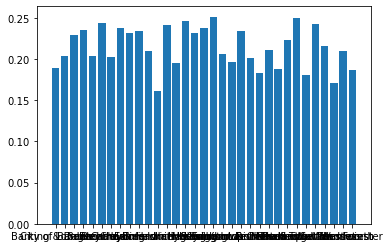

In [29]:
#I want to visualize my data, an X, Y plot that will show the ratio for each borough. 
borough_ratio = []
ratio_list = [] #If I put this list inside the loop, I will end up making a new list everytime it iterates

for x in boroughs:
    ratio_list.append(create_price_ratio(x))
    borough_ratio = dict(zip(boroughs, ratio_list))

plt.bar(boroughs, ratio_list)




In [30]:
min(borough_ratio, key = borough_ratio.get)

'Hackney'

In [31]:
create_price_ratio('Hackney')

0.16133493530705734

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

In [32]:
'''
Per my investigation, the lower the housing price ratio, the bigger the difference between the 2018 and 1998 average 
prices. There are several potential candidates, but in our case, Hackney was the winner of all the London Boroughs. 
Now it may indicate that it had a huge increase in average pricing, or the area had a very low average pricing to
begin with.'''

'\nPer my investigation, the lower the housing price ratio, the bigger the difference between the 2018 and 1998 average \nprices. There are several potential candidates, but in our case, Hackney was the winner of all the London Boroughs. \nNow it may indicate that it had a huge increase in average pricing, or the area had a very low average pricing to\nbegin with.'